### Challenge 7 Classification

##### Challenge 1

Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns
from patsy import dmatrices
from sklearn import linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.learning_curve import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVC
import operator
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 

/home/kalgi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/kalgi/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [2]:
col_names = ['Class Name','handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution',
             'physician-fee-freeze','el-salvador-aid','religious-groups-in-schools','anti-satellite-test-ban',
             'aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
             'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
df = pd.read_csv('/home/kalgi/Downloads/votes_data.txt', names=col_names, header=None)

In [3]:
df1 = df.replace(['y', 'n','?'], [1, 0, None])

In [4]:
df2 = df1.fillna(df1.mean()) 

##### Challenge 2

Split the data into a test and training set. Use this function:

In [5]:
X = df2.loc[:, 'handicapped-infants':'export-administration-act-south-africa']
y = df2['Class Name']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

##### Challenge 3

Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat):

Try it with a lot of different k values (number of neighbors), from 1 to 20, and on the test set calculate the accuracy (number of correct predictions / number of all predictions) for each k

You can use this to calculate accuracy:

from sklearn.metrics import accuracy_score
Which k value gives the highest accuracy?

In [6]:
k_range = list(range(1, 21))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

[0.9254907882814859, 0.9350145978052955, 0.93512030605053875, 0.93977398570421822, 0.92830212423235692, 0.9352839021443673, 0.93079130172153435, 0.9352839021443673, 0.93290294976341492, 0.93290294976341492, 0.92841034934058198, 0.93068307661330929, 0.92613762206785455, 0.9260293969596296, 0.92613762206785455, 0.93068307661330929, 0.9260293969596296, 0.92841034934058198, 0.92148394241417508, 0.91921121514144777]
0.919211215141


##### Challenge 4

Make a similar model but with LogisticRegression instead, calculate test accuracy.

In [7]:
logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.958227625088


##### Challenge 5

Make a bar graph of democrats and republicans. How many of each are there?

Make a very simple predictor that predicts 'democrat' for every incoming example.

Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its accuracy.

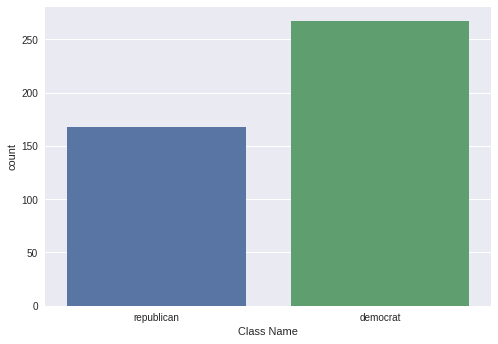

In [8]:
ax = sns.countplot(x="Class Name", data=df2)

In [9]:
df2['dummy_republicans'] = 'republican'
df2['dummy_democrat'] = 'democrat'

X = df2.loc[:, 'handicapped-infants':'export-administration-act-south-africa']
y = df2['dummy_republicans']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

X = df2.loc[:, 'handicapped-infants':'export-administration-act-south-africa']
y = df2['dummy_democrat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

1.0
1.0


In [10]:
X = df2.loc[:, 'handicapped-infants':'export-administration-act-south-africa']
y1 = df2['dummy_republicans']
y2 = df2['dummy_democrat']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.4, random_state=42)
k_range1 = list(range(1, 21))
k_scores1 = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train1, y_train1)
    y_pred1 = knn.predict(X_test1)
    scores1 = metrics.accuracy_score(y_test1, y_pred1)
    k_scores1.append(scores1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.4, random_state=42)
k_range2 = list(range(1, 21))
k_scores2 = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train2, y_train2)
    y_pred = knn.predict(X_test2)
    scores2 = metrics.accuracy_score(y_test2, y_pred)
    k_scores2.append(scores2)
X = df2.loc[:, 'handicapped-infants':'export-administration-act-south-africa']
y = df2['Class Name']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
k_range = list(range(1, 21))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores = metrics.accuracy_score(y_test, y_pred)
    k_scores.append(scores)
    
logreg = LogisticRegression()
logi_score = cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean()
log_score = [logi_score for i in range(0,21)]

##### Challenge 6

Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.

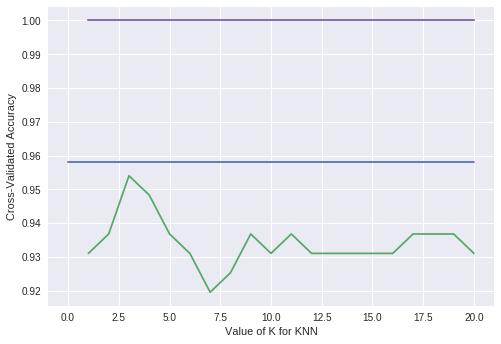

In [11]:
plt.plot(log_score,label='Logistic Regression')
plt.plot(k_range, k_scores,label='Class Name')
plt.plot(k_range1, k_scores1,label='Replicans')
plt.plot(k_range2, k_scores2, label='Democrats')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

##### Challenge 7

Plot a learning curve for the logistic regression model. But instead of going through the painstaking steps of doing it yourself, use this function:

from sklearn.learning_curve import learning_curve
This will give you the m, training errors and testing errors. All you need to do is plot them. You don't even need to give it separate training/test sets. It will do crossvalidation all by itself. Easy, isn't it? : ) Remember, since it does cross-validation, it doesn't have a single training error or test error per m value. Instead, it has one for each fold (separate partition) of the cross validation. A good idea is to take the mean of these errors from different folds. This gives you a meaningful single number per m. What I mean is that doing something like:

train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)
Before plotting m vs train_cv_err and m vs test_cv_err, where train_err and test_err are the vectors returned by the learning curve function. The np.mean(...., axis=1) means take the mean along axis 1 (axis 1 is the columns axis-- for each row, you have a bunch of columns, each corresponding to a cross validation fold, you are averaging these columns for each row).

Draw the learning curve for KNN with the best k value as well.

In [12]:
logreg1 = LogisticRegression()

In [13]:
train_sizes, train_scores, test_scores = learning_curve(logreg1, X, y)

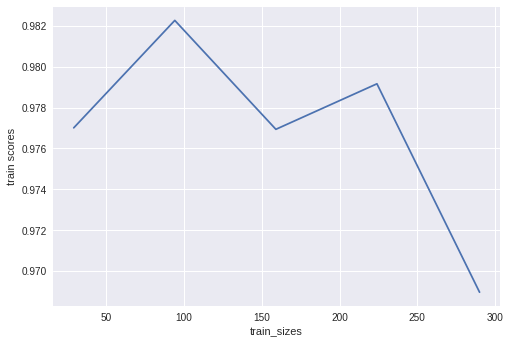

In [14]:
train_cv_err = np.mean(train_scores, axis=1)
plt.plot(train_sizes,train_cv_err)
plt.xlabel('train_sizes')
plt.ylabel('train scores')

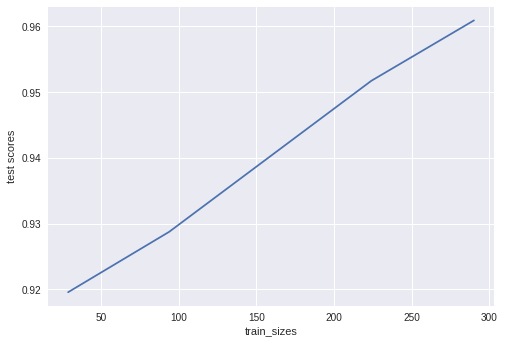

In [15]:
test_cv_err = np.mean(test_scores, axis=1)
plt.plot(train_sizes,test_cv_err)
plt.xlabel('train_sizes')
plt.ylabel('test scores')

2 0.954022988506


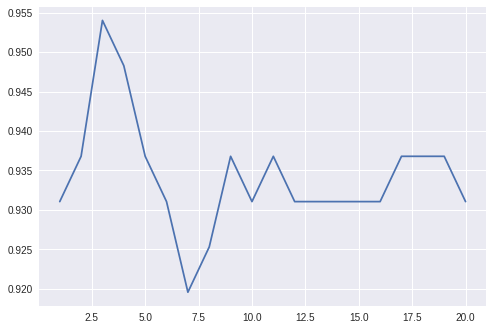

In [16]:
X = df2.loc[:, 'handicapped-infants':'export-administration-act-south-africa']
y = df2['Class Name']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
k_range = list(range(1, 21))
k_scores = []
index = 0
value = 0
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores = metrics.accuracy_score(y_test, y_pred)
    k_scores.append(scores)
    index, value = max(enumerate(k_scores), key=operator.itemgetter(1))
print(index,value)

plt.plot(k_range, k_scores,label='Class Name')

In [17]:
KNN = KNeighborsClassifier(n_neighbors=2)
train_sizes1, train_scores1, test_scores1 = learning_curve(KNN, X, y)

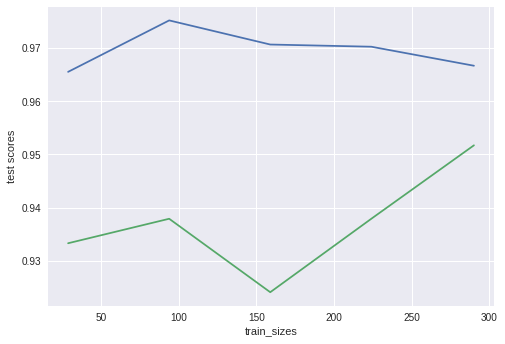

In [19]:
train_cv_err1 = np.mean(train_scores1, axis=1)
plt.plot(train_sizes1, train_cv_err1)
plt.xlabel('train_sizes')
plt.ylabel('train scores')
test_cv_err1 = np.mean(test_scores1, axis=1)
plt.plot(train_sizes1, test_cv_err1)
plt.xlabel('train_sizes')
plt.ylabel('test scores')

##### Challenge 8
This is a preview of many other classification algorithms that we will go over. Scikit.learn has the same interface for all of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier. Use each of these to classify your data and print the test accuracy of each:

Gaussian Naive Bayes
SVM (Support Vector Machine) Classifier
Decision Tree
Random Forest

In [20]:
X1 = df2.loc[:, 'handicapped-infants':'export-administration-act-south-africa']
y1 = df2['Class Name']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.4, random_state=42)
clf = GaussianNB()
clf.fit(X_train1, y_train1)
gauss_pred = clf.predict(X_test1)
scores1 = metrics.accuracy_score(y_test1, gauss_pred)
scores1

0.94252873563218387

In [21]:
X2 = df2.loc[:, 'handicapped-infants':'export-administration-act-south-africa']
y2 = df2['Class Name']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.4, random_state=42)
clf2 = SVC()
clf2.fit(X_train2, y_train2)
gauss_pred2 = clf2.predict(X_test2)
scores2 = metrics.accuracy_score(y_test2, gauss_pred)
scores2

0.94252873563218387

In [22]:
X3 = df2.loc[:, 'handicapped-infants':'export-administration-act-south-africa']
y3 = df2['Class Name']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.4, random_state=42)
clf3 = DecisionTreeClassifier(random_state=1)
clf3.fit(X_train3, y_train3)
gauss_pred3 = clf3.predict(X_test3)
scores3 = metrics.accuracy_score(y_test3, gauss_pred3)
scores3


0.95402298850574707

In [23]:
X4 = df2.loc[:, 'handicapped-infants':'export-administration-act-south-africa']
y4 = df2['Class Name']
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.4, random_state=42)
clf4 = RandomForestClassifier(max_depth=5, random_state=1)
clf4.fit(X_train4, y_train4)
gauss_pred4 = clf4.predict(X_test4)
scores4 = metrics.accuracy_score(y_test4, gauss_pred4)
scores4


0.97701149425287359

##### Challenge 9
There is actually a way to do cross validation quickly to get your accuracy results for an algorithm, without separating training and test yourself:

from sklearn.cross_validation import cross_val_score
Just like the learning_curve function, this takes a classifier object, X and Y. Returns accuracy (or whatever score you prefer by using the scoring keyword argument). Of course, it will return a score for each cross validation fold, so to get the generalized accuracy, you need to take the mean of what it returns.

Use this function to calculate the cross validation score of each of the classifiers you tried before.

In [24]:
X5 = df2.loc[:, 'handicapped-infants':'export-administration-act-south-africa']
y5 = df2['Class Name']
def accuracy_scores(objects):
    scores = cross_val_score(objects, X5, y5, cv=10, scoring='accuracy').mean()
    return scores
gauss_score = accuracy_scores(clf)
svc = accuracy_scores(clf2)
dtc = accuracy_scores(clf3)
rfc = accuracy_scores(clf4)

In [26]:
df2.loc[:, 'handicapped-infants':'duty-free-exports']
df2.shape

(435, 19)

In [27]:
df2['export-administration-act-south-africa'] = df2['export-administration-act-south-africa'].astype(np.int64)

##### Challenge 10
Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0.

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.

In [28]:
X6 = df2.loc[:, 'handicapped-infants':'duty-free-exports']
y6 = df2['export-administration-act-south-africa']
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size=0.4, random_state=42)
knn6 = KNeighborsClassifier(n_neighbors=5)
knn6.fit(X_train6, y_train6)
y_pred6 = knn6.predict(X_test6)
scores6 = metrics.accuracy_score(y_test6, y_pred6)
scores6

0.60344827586206895

##### Challenge 11
Back to movie data! Choose one categoric feature to predict. I chose MPAA Rating, but genre, month, etc. are all decent choices. If you don't have any non-numeric features, you can make two bins out of a numeric one (like "Runtime>100 mins" and "Runtime<=100 mins")

Make a bar graph of how many of each movie there is in the data. For example, with Ratings, show how many G, PG, PG-13, R movies there are, etc. (basically a histogram of your labels).

Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.

Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set.

How much better do KNN and logistic regression do versus the baseline?

What are the coefficients of logistic regression? Which features affect the outcome how?

In [29]:
movies = pd.read_csv('/home/kalgi/ds/metis/sf17_ds8/challenges/challenges_data/2013_movies.csv')

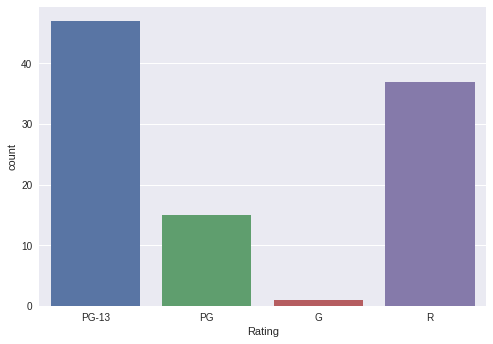

In [30]:
ax1 = sns.countplot(x="Rating", data=movies)

In [31]:
movies = movies.fillna(0)
X7 = movies.loc[:, 'Budget':'DomesticTotalGross']
y7 = movies['Rating']
X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y7, test_size=0.4, random_state=42)
knn7 = KNeighborsClassifier(n_neighbors=5)
knn7.fit(X_train7, y_train7)
y_pred7 = knn7.predict(X_test7)
scores7 = metrics.accuracy_score(y_test7, y_pred7)
scores7

0.5

In [32]:
X8 = movies.loc[:, 'Budget':'DomesticTotalGross']
y8 = movies['Rating']
X_train8, X_test8, y_train8, y_test8 = train_test_split(X8, y8, test_size=0.4, random_state=42)
knn8 = LogisticRegression()
knn8.fit(X_train8, y_train8)
y_pred8 = knn8.predict(X_test8)
scores8 = metrics.accuracy_score(y_test8, y_pred8)
scores8

0.67500000000000004

In [33]:
np.exp(knn8.coef_)

array([[ 0.99999777,  1.        ],
       [ 1.        ,  0.99999999],
       [ 1.        ,  1.        ],
       [ 0.99999999,  1.        ]])

##### Interpreting co-efficients for movie data
For the movie data, the coefficients need to be subtracted from 1 i.e. 1-0.99999777 and the result will show if it's significant 

##### Challenge 12
Now you are a classification master. The representative votes dataset only had 0s and 1s. Let's just swiftly tackle the breast cancer surgery data.

Get it from here: Haberman Survival Dataset

What is the average and standard deviation of the age of all of the patients?
What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?
What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?
Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.
What is the earliest year of surgery in this dataset?
What is the most recent year of surgery?
Use logistic regression to predict survival after 5 years. How well does your model do?
What are the coefficients of logistic regression? Which features affect the outcome how?
Draw the learning curve for logistic regression in this case.

In [34]:
column_names = ['Age of patient at time of operation', 'Patients year of operation','Number of positive axillary nodes detected',
'Survival status']
haberman = pd.read_csv('/home/kalgi/Downloads/data.txt', names=column_names, header=None)

In [35]:
haberman.groupby('Survival status', as_index=False)['Age of patient at time of operation'].mean()

,Survival status,Age of patient at time of operation
0,1,52.017778
1,2,53.679012


In [36]:
haberman.groupby('Survival status', as_index=False)['Age of patient at time of operation'].std()

,Survival status,Age of patient at time of operation
0,1.000000,11.012154
1,1.414214,10.167137


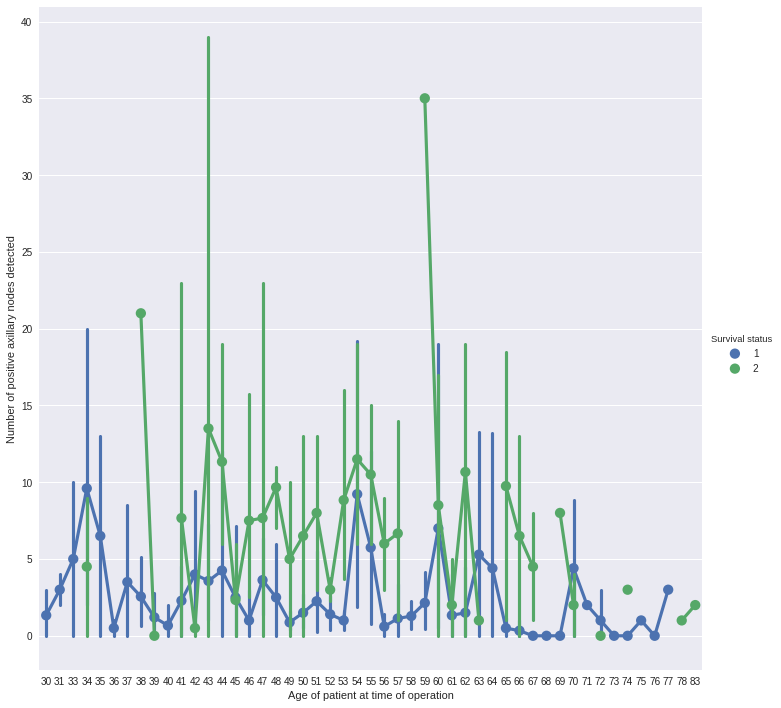

In [37]:
sns.factorplot(x="Age of patient at time of operation", y="Number of positive axillary nodes detected", hue="Survival status", data=haberman, size=10, aspect=1)

In [38]:
max(haberman['Patients year of operation'])

69

In [39]:
X9 = haberman.loc[:, 'Age of patient at time of operation':'Number of positive axillary nodes detected']
y9 = haberman['Survival status']
X_train9, X_test9, y_train9, y_test9 = train_test_split(X9, y9, test_size=0.3, random_state=42)
knn9 = LogisticRegression()
knn9.fit(X_train9, y_train9)
y_pred9 = knn9.predict(X_test9)
scores9 = metrics.accuracy_score(y_test9, y_pred9)
scores9

0.73913043478260865

In [40]:
np.exp(knn9.coef_)

array([[ 1.02922409,  0.95358748,  1.09544113]])

##### Interpreting co-efficients for haberman data
For the haberman data, the coefficients need to be subtracted from 1 i.e. 1-1.02922409 and the result will show if it's significant. So here, number of positive axillary nodes detected seems to be the most significant, then the age of patient at time of operation.

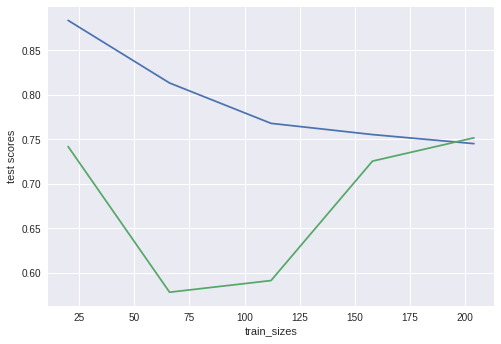

In [41]:
train_sizes2, train_scores2, test_scores2 = learning_curve(knn9, X9, y9)
train_cv_err2 = np.mean(train_scores2, axis=1)
plt.plot(train_sizes2,train_cv_err2)
plt.xlabel('train_sizes')
plt.ylabel('train scores')
test_cv_err2 = np.mean(test_scores2, axis=1)
plt.plot(train_sizes2,test_cv_err2)
plt.xlabel('train_sizes')
plt.ylabel('test scores')

###### Learning curve interpretation
For this learning curve, training error seems to be reducing with increasing data size but the test error increases after a certain point. This is a little different from what i assumed should be the case. The training error should be less than the testing error.